# 8. Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using Boston
Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset
contains information about various houses in Boston through different parameters. There are
506 samples and 14 feature variables in this dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ds = pd.read_csv( "./boston_housing.csv" )
ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 1. About the dataset


    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


In [3]:
ds.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [4]:
ds.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

## 2. Exploratory Data Analysis

### 2.1. Summary Statistics

In [5]:
ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

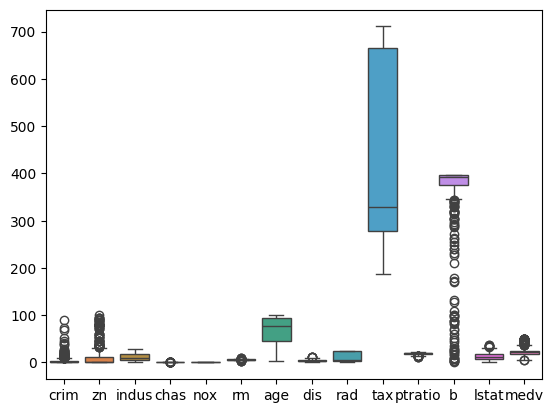

In [6]:
sns.boxplot( data=ds )

### 2.2. Correlation Analysis

In [7]:
ds.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

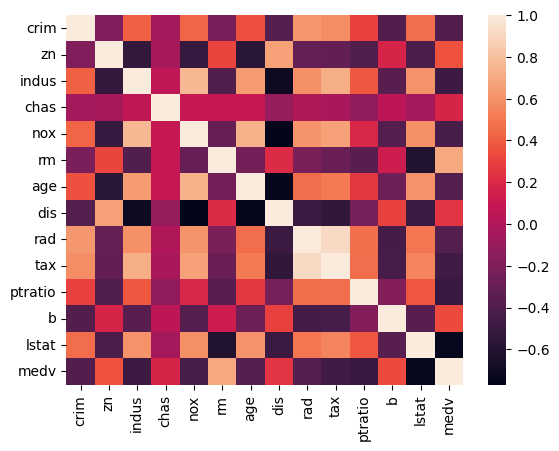

In [8]:
# sns.heatmap( ds.corr() , cmap="twilight" )
sns.heatmap(ds.corr())

In [9]:
ds.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

### 2.2. Outlier Removal

In [10]:
def remove_outliers(
    feature_name: str
):
    global ds
    q3 , q1 = np.percentile( ds[ feature_name ] , [ 75 , 25 ] )
    iqr = q3 - q1
    ds = ds[ (ds[ feature_name ] >= q1 - 1.5 * iqr) & (ds[ feature_name ] <= q3 + 1.5 * iqr) ]

remove_outliers( "crim" )
remove_outliers( "zn" )
remove_outliers( "b" )
remove_outliers( "rad" )
remove_outliers( "tax" )
remove_outliers( "lstat" )
remove_outliers( "medv" )

In [11]:
ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.269166,7.913858,8.254794,0.063670,0.504317,6.301839,61.386517,4.300715,4.535581,305.528090,18.302622,390.231760,10.370712,23.465543
std,0.376737,13.134000,5.206476,0.244623,0.071415,0.493938,26.316286,1.732566,1.652535,65.240807,1.909068,9.083787,4.413217,5.587911
min,0.006320,0.000000,1.250000,0.000000,0.409000,4.973000,2.900000,1.525700,1.000000,188.000000,13.000000,350.450000,2.870000,11.900000
25%,0.069020,0.000000,4.930000,0.000000,0.447000,5.955500,41.100000,2.840500,4.000000,270.000000,17.400000,388.550000,6.765000,19.650000
50%,0.131170,0.000000,6.910000,0.000000,0.493000,6.182000,62.800000,4.031700,4.000000,300.000000,18.500000,393.550000,9.620000,22.500000
75%,0.286760,20.000000,9.900000,0.000000,0.538000,6.582500,84.550000,5.471300,5.000000,330.000000,19.600000,396.900000,13.120000,25.750000
max,2.733970,45.000000,25.650000,1.000000,0.871000,8.069000,100.000000,9.222900,8.000000,437.000000,21.200000,396.900000,23.090000,39.800000


<Axes: >

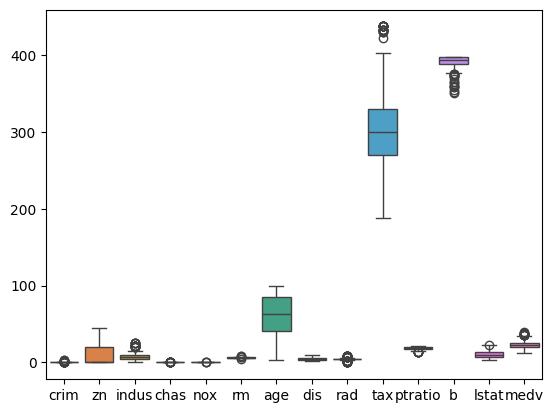

In [12]:
sns.boxplot( data=ds )

In [13]:
ds.skew()

crim       3.457800
zn         1.372669
indus      1.554100
chas       3.594281
nox        1.776428
rm         0.769068
age       -0.304989
dis        0.575180
rad        0.173594
tax        0.466026
ptratio   -0.538715
b         -2.052233
lstat      0.636089
medv       0.800355
dtype: float64

### 2.3. Data Transformation

#### 2.3.1. Log Transformation

In [14]:
ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
ds[ "crim" ] = np.log2( ds["crim"] )
ds[ "zn" ] = np.cbrt( ds["zn"] )
ds[ "nox" ] = np.log2( ds["nox"] )

In [16]:
ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-7.305860,2.620741,2.31,0,-0.894322,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,-5.194427,0.000000,7.07,0,-1.092340,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,-5.195484,0.000000,7.07,0,-1.092340,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,-4.949199,0.000000,2.18,0,-1.126580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,-3.856215,0.000000,2.18,0,-1.126580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-3.997002,0.000000,11.93,0,-0.803393,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,-4.465301,0.000000,11.93,0,-0.803393,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,-4.040734,0.000000,11.93,0,-0.803393,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,-3.189812,0.000000,11.93,0,-0.803393,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: xlabel='zn'>

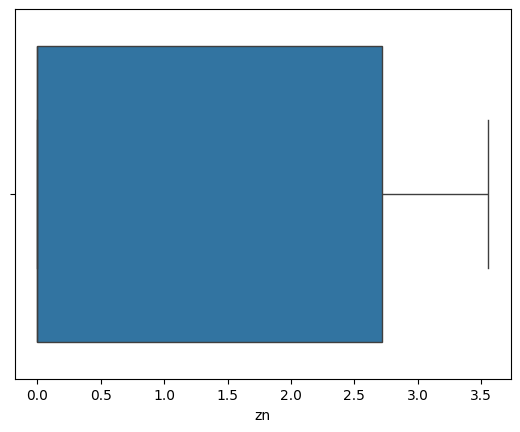

In [17]:
sns.boxplot( data=ds , x="zn" )

<Axes: xlabel='crim'>

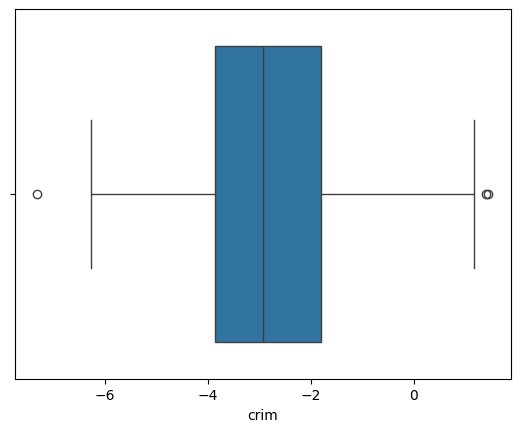

In [18]:
sns.boxplot( data=ds , x="crim" )

<Axes: xlabel='nox'>

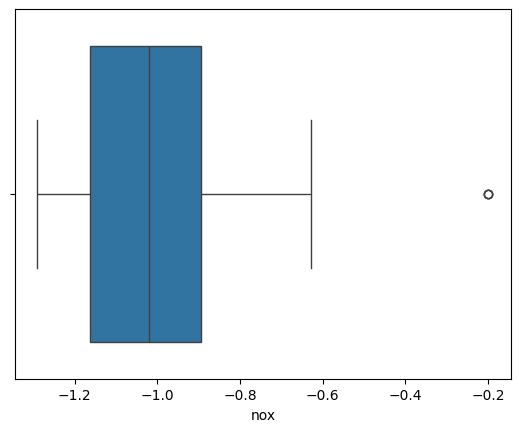

In [19]:
sns.boxplot( data=ds , x="nox" )

<Axes: >

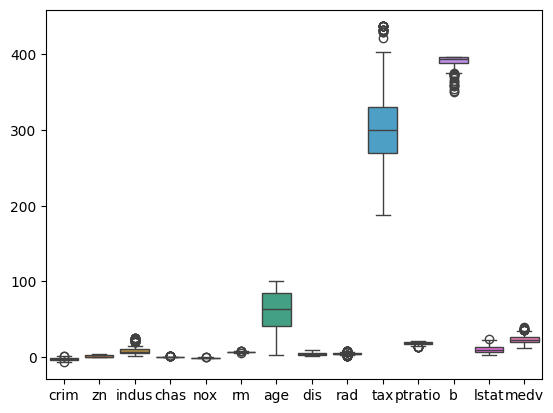

In [20]:
sns.boxplot( data=ds )

In [21]:
ds.skew()

crim       0.381947
zn         0.943741
indus      1.554100
chas       3.594281
nox        1.042174
rm         0.769068
age       -0.304989
dis        0.575180
rad        0.173594
tax        0.466026
ptratio   -0.538715
b         -2.052233
lstat      0.636089
medv       0.800355
dtype: float64

#### 2.3.2. Min-max normalization

In [22]:
def min_max_normalize( name: str ):
    ds[ name ] = (ds[ name ] - ds[ name ].min()) / ( ds[ name ].max() - ds[ name ].min() )

for col in ds.drop( [ "medv" ] , axis=1 ).columns:
    min_max_normalize( col )

## 3. Model Building

### 3.1. train-test split

In [23]:
from sklearn.model_selection import train_test_split

X = np.asarray( ds.drop( [ "medv" ] , axis=1 ) )
y = np.asarray( ds[ "medv" ] )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit( X_train , y_train )
y_pred = reg.predict( X_test )

<Axes: xlabel='medv'>

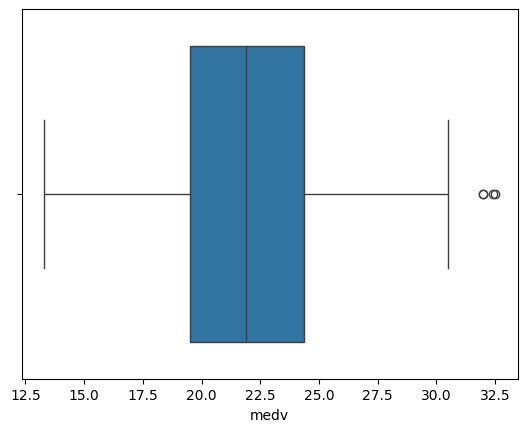

In [ ]:
sns.boxplot( data=ds , x="medv" ) 

In [ ]:
from sklearn.metrics import mean_absolute_error , r2_score

print( mean_absolute_error( y_test , y_pred ) )

# Reference: https://en.wikipedia.org/wiki/Coefficient_of_determination
print( r2_score( y_test , y_pred ) )

1.6611609911015393
0.763262867667589
